# Curso: "El lenguaje de programación Python para la docencia en el ámbito científico"

&nbsp;  
<img src="../images/logo_python_letras.png" align="center" style="width:350px;"/>

<strong><div style="text-align: center"> [Mabel Delgado Babiano](https://es.linkedin.com/in/mabeldelgadob)</div></strong>

&nbsp;  
<div style="text-align: center">Heredia, Costa Rica</div>
<div style="text-align: center">4 - 7 Febrero 2019</div>


# Búsqueda de raíces de ecuaciones no lineales con SciPy

_¿Te acuerdas de todos esos esquemas numéricos para integrar ecuaciones diferenciales ordinarias? Es bueno saber que existen y qué peculiaridades tiene cada uno, pero en este curso no queremos implementar esos esquemas: queremos resolver las ecuaciones. Los problemas de evolución están por todas partes en ingeniería y son de los más divertidos de programar._

In [1]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

Visto cómo resolver sistemas de ecuaciones lineales, tal vez sea incluso más atractivo resolver ecuaciones no lineales. Para ello, importaremos el paquete `optimize` de SciPy:

In [13]:
from scipy import optimize

La ayuda de este paquete es bastante larga (puedes consultarla también en http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). El paquete `optimize` incluye multitud de métodos para **optimización**, **ajuste de curvas** y **búsqueda de raíces**. Vamos a centrarnos ahora en la búsqueda de raíces de funciones escalares. Para más información puedes leer http://pybonacci.org/2012/10/25/como-resolver-ecuaciones-algebraicas-en-python-con-scipy/

<div class="alert alert-info">**Nota**: La función `root` se utiliza para hallar soluciones de *sistemas* de ecuaciones no lineales así que obviamente también funciona para ecuaciones escalares. No obstante, vamos a utilizar las funciones `brentq` y `newton` para que el método utilizado quede más claro.</div>

Hay básicamente dos tipos de algoritmos para hallar raíces de ecuaciones no lineales:

* Aquellos que operan en un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. Más lentos, convergencia asegurada.
* Aquellos que operan dando una condición inicial $x_0$ más o menos cerca de la solución. Más rápidos, convergencia condicionada.

De los primeros vamos a usar la función `brentq` (aunque podríamos usar `bisect`) y de los segundos vamos a usar `newton` (que en realidad engloba los métodos de Newton y de la secante).

## Método `brentq`

Vamos a resolver un ejempl o para ver como se aplica:

$$\ln{x} = \sin{x} \Rightarrow F(x) \equiv \ln{x} - \sin{x} = 0$$

Lo primero que tengo que hacer es definir la ecuación, que matemáticamente será una función $F(x)$ que quiero igualar a cero.

In [50]:
def F(x):
    return np.log(x) - np.sin(x)

Para hacernos una idea de las posibles soluciones siempre podemos representar gráficamente esa función:

/home/mabel/mytools/anaconda3_64/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/mabel/mytools/anaconda3_64/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


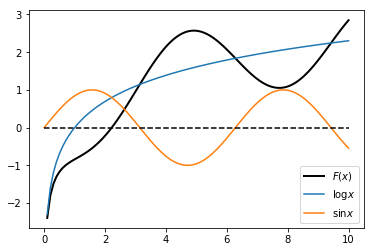

In [51]:
x = np.linspace(0, 10, num=100)
plt.plot(x, F(x), 'k', lw=2, label="$F(x)$")
plt.plot(x, np.log(x), label="$\log{x}$")
plt.plot(x, np.sin(x), label="$\sin{x}$")
plt.plot(x, np.zeros_like(x), 'k--')
plt.legend(loc=4)

Y utilizando por ejemplo el método de Brent en el intervalo $[0, 3]$:

In [52]:
optimize.brentq(F, 0, 3)

/home/mabel/mytools/anaconda3_64/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


2.219107148913746

<div class="alert alert-warning">¿No habíamos dicho que en Python no se puede dividir por cero? Observa esto:</div>

In [53]:
1 / 0

ZeroDivisionError: division by zero

In [54]:
1 / np.array([0])

/home/mabel/mytools/anaconda3_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([inf])

<div class="alert alert-warning">Si manejamos arrays de NumPy las operaciones siguen las reglas dadas en el estándar de punto flotante (IEEE 754). Las divisiones por cero resultan en infinito, 0 / 0 es NaN, etc. Podemos controlar si queremos warnings o errores con la función `np.seterr`.</div>

## Método `newton`

Vamos a resolver ahora una ecuación que depende de un parámetro:

$$\sqrt{x} + \log{x} = C$$.

In [55]:
def G(x, C):
    return C - np.sqrt(x) - np.log(x)

**Nuestra incógnita sigue siendo $x$**, así que debe ir en primer lugar. El resto de parámetros van a continuación, y sus valores se especifican a la hora de resolver la ecuación usando `args`:

In [25]:
optimize.newton(G, 2.0, args=(2,))

1.8773216666875554

##### Argumentos extra

Nuestras funciones siempre tienen que tomar como primer argumento la incógnita, el valor que la hace cero. Si queremos incluir más, tendremos que usar el argumento `args` de la funciones de búsqueda de raíces. Este patrón se usa también en otras partes de SciPy, como ya veremos.

## Ejemplos

#### Flujo compresible

Esta es la relación isentrópica entre el número de Mach $M(x)$ en un conducto de área $A(x)$:

$$ \frac{A(x)}{A^*} = \frac{1}{M(x)} \left( \frac{2}{1 + \gamma} \left( 1 + \frac{\gamma - 1}{2} M(x)^2 \right) \right)^{\frac{\gamma + 1}{2 (\gamma - 1)}}$$

Para un conducto convergente:

$$ \frac{A(x)}{A^*} = 3 - 2 x \quad x \in [0, 1]$$

Hallar el número de Mach en la sección $x = 0.9$.

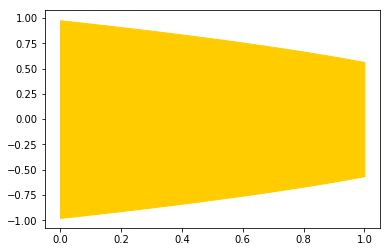

In [56]:
def A(x):
    return 3 - 2 * x

x = np.linspace(0, 1)
area = A(x)
r = np.sqrt(area / np.pi)
plt.fill_between(x, r, -r, color="#ffcc00")

¿Cuál es la función $F$ ahora? Hay dos opciones: definir una función $F_{0.9}(M)$ que me da el número de Mach en la sección $0.9$ o una función $F(M; x)$ con la que puedo hallar el número de Mach en cualquier sección. *Bonus points* si haces la segunda opción :)

Para resolver la ecuación utiliza el método de Brent (bisección). ¿En qué intervalo se encontrará la solución? ¡Si no te haces una idea es tan fácil como pintar la función $F$!

In [57]:
def F(M, x, g):
    return A(x) - (1 / M) * ((2 / (1 + g)) * (1 + (g - 1) / 2 * M ** 2)) ** ((g + 1) / (2 * (g - 1))) 

In [58]:
optimize.brentq(F, 0.01, 1, args=(0.9, 1.4))

0.5902487609888621

### Ecuación de Kepler

Representar la ecuación de Kepler

$$M = E - e \sin E$$

que relaciona dos parámetros geométricos de las órbitas elípticas, la anomalía media $M$ y la anomalía excéntrica $E$.

![Anomalías excéntrica y media](http://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Kepler%27s-equation-scheme.png/250px-Kepler%27s-equation-scheme.png)

para los siguientes valores de excentricidad:

* Tierra: $0.0167$
* Plutón: $0.249$
* Cometa Holmes: $0.432$
* 28P/Neujmin: $0.775$
* Cometa Halley: $0.967$

Para reproducir esta gráfica:

In [59]:
from IPython.display import HTML
HTML('<iframe src="http://en.m.wikipedia.org/wiki/Kepler%27s_equation" width="800" height="400"></iframe>')

Para ello utilizaremos el método de Newton (secante).

1- Define la función correspondiente a la ecuación de Kepler, que no solo es una ecuación implícita sino que además depende de un parámetro. ¿Cuál es la incógnita?

In [60]:
def F(E, e, M):
    return M - E + e * np.sin(E)

2- Como primer paso, resuélvela para la excentricidad terrerestre y anomalía media $M = 0.3$. ¿Qué valor escogerías como condición inicial?

In [61]:
optimize.newton(F, 0.3, args=(0.0167, 0.3))

0.3050151371487578

3- Como siguiente paso, crea un dominio (`linspace`) de anomalías medias entre $0$ y $2 \pi$ y resuelve la ecuación de Kepler con excentricidad terrestre para todos esos valores. Fíjate que necesitarás un array donde almacenar las soluciones. Representa la curva resultante.

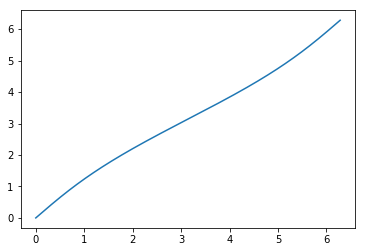

In [62]:
N = 500

M = np.linspace(0, 2 * np.pi, N)
sol = np.zeros_like(M)

for ii in range(N):
    sol[ii] = optimize.newton(F, sol[ii - 1], args=(0.249, M[ii]))

plt.plot(M, sol)

4- Como último paso, solo tienes que meter parte del código que ya has escrito en un bucle que cambie el valor de la excentricidad 5 veces. Es aconsejable que tengas todo ese código en una única celda (esta de aquí abajo).

Vamos a introducir aquí un truco muy útil en Python:

Text(0.5,1,"Kepler's equation solutions")

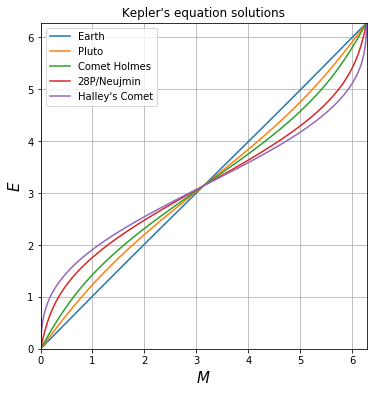

In [63]:
M = np.linspace(0, 2 * np.pi, N)
sol = np.zeros_like(M)

plt.figure(figsize=(6, 6))

for ee in 0.0167, 0.249, 0.432, 0.775, 0.967:
    # Para cada valor de excentricidad sobreescribimos el array sol
    for ii in range(N):
        sol[ii] = optimize.newton(F, sol[ii - 1], args=(ee, M[ii]))
    plt.plot(M, sol)

plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)
plt.xlabel("$M$", fontsize=15)
plt.ylabel("$E$", fontsize=15)
plt.gca().set_aspect(1)
plt.grid(True)
plt.legend(["Earth", "Pluto", "Comet Holmes", "28P/Neujmin", "Halley's Comet"], loc=2)
plt.title("Kepler's equation solutions")

--- 

__Referencias__

Material adaptado del "Curso AeroPython". AeroPython. https://github.com/AeroPython <br>

 <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [34]:
# preserve
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/style.css'
HTML(open(css_file, "r").read())